In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import sys
from pathlib import Path

PROJECT_ROOT = str(Path.cwd().parent.resolve())
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

import Class_site as site
import honeycomb_plot as honey
import importlib
importlib.reload(site)
importlib.reload(honey)

<module 'honeycomb_plot' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/honeycomb_plot.py'>

In [2]:
Npx = 2 # Number of plaquette in each dimension
Npy = 4
model = site.SitesPBCxy(Npx, Npy)

In [3]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print("Nxsites ", model.Nxsites)
print("Nyrows ", model.Nyrows)
print(model.partition)
print(model.partition[0])

Number of sites: 16
array of ordered sites:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Nxsites  4
Nyrows  4
['A' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'A']
A


In [4]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]]


In [5]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
(1, 1)


In [6]:
9 % 2

1

In [7]:
xx_bond, yy_bond, zz_bond = model.get_bonds()
# diagonal_bond = model.get_diagonalbonds()
# anyon_bonds, px, py = model.get_anyonbonds()

In [8]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))
# print("diagonal_bond: ", np.array(diagonal_bond))
# print("anyon_bonds: ", np.array(anyon_bonds))

xx_bond:  [[ 0  1]
 [ 2  3]
 [ 5  6]
 [ 7  4]
 [ 8  9]
 [10 11]
 [13 14]
 [15 12]]
yy_bond:  [[ 2  1]
 [ 0  3]
 [ 5  4]
 [ 7  6]
 [10  9]
 [ 8 11]
 [13 12]
 [15 14]]
zz_bond:  [[ 0  4]
 [ 2  6]
 [ 5  9]
 [ 7 11]
 [ 8 12]
 [10 14]
 [13  1]
 [15  3]]


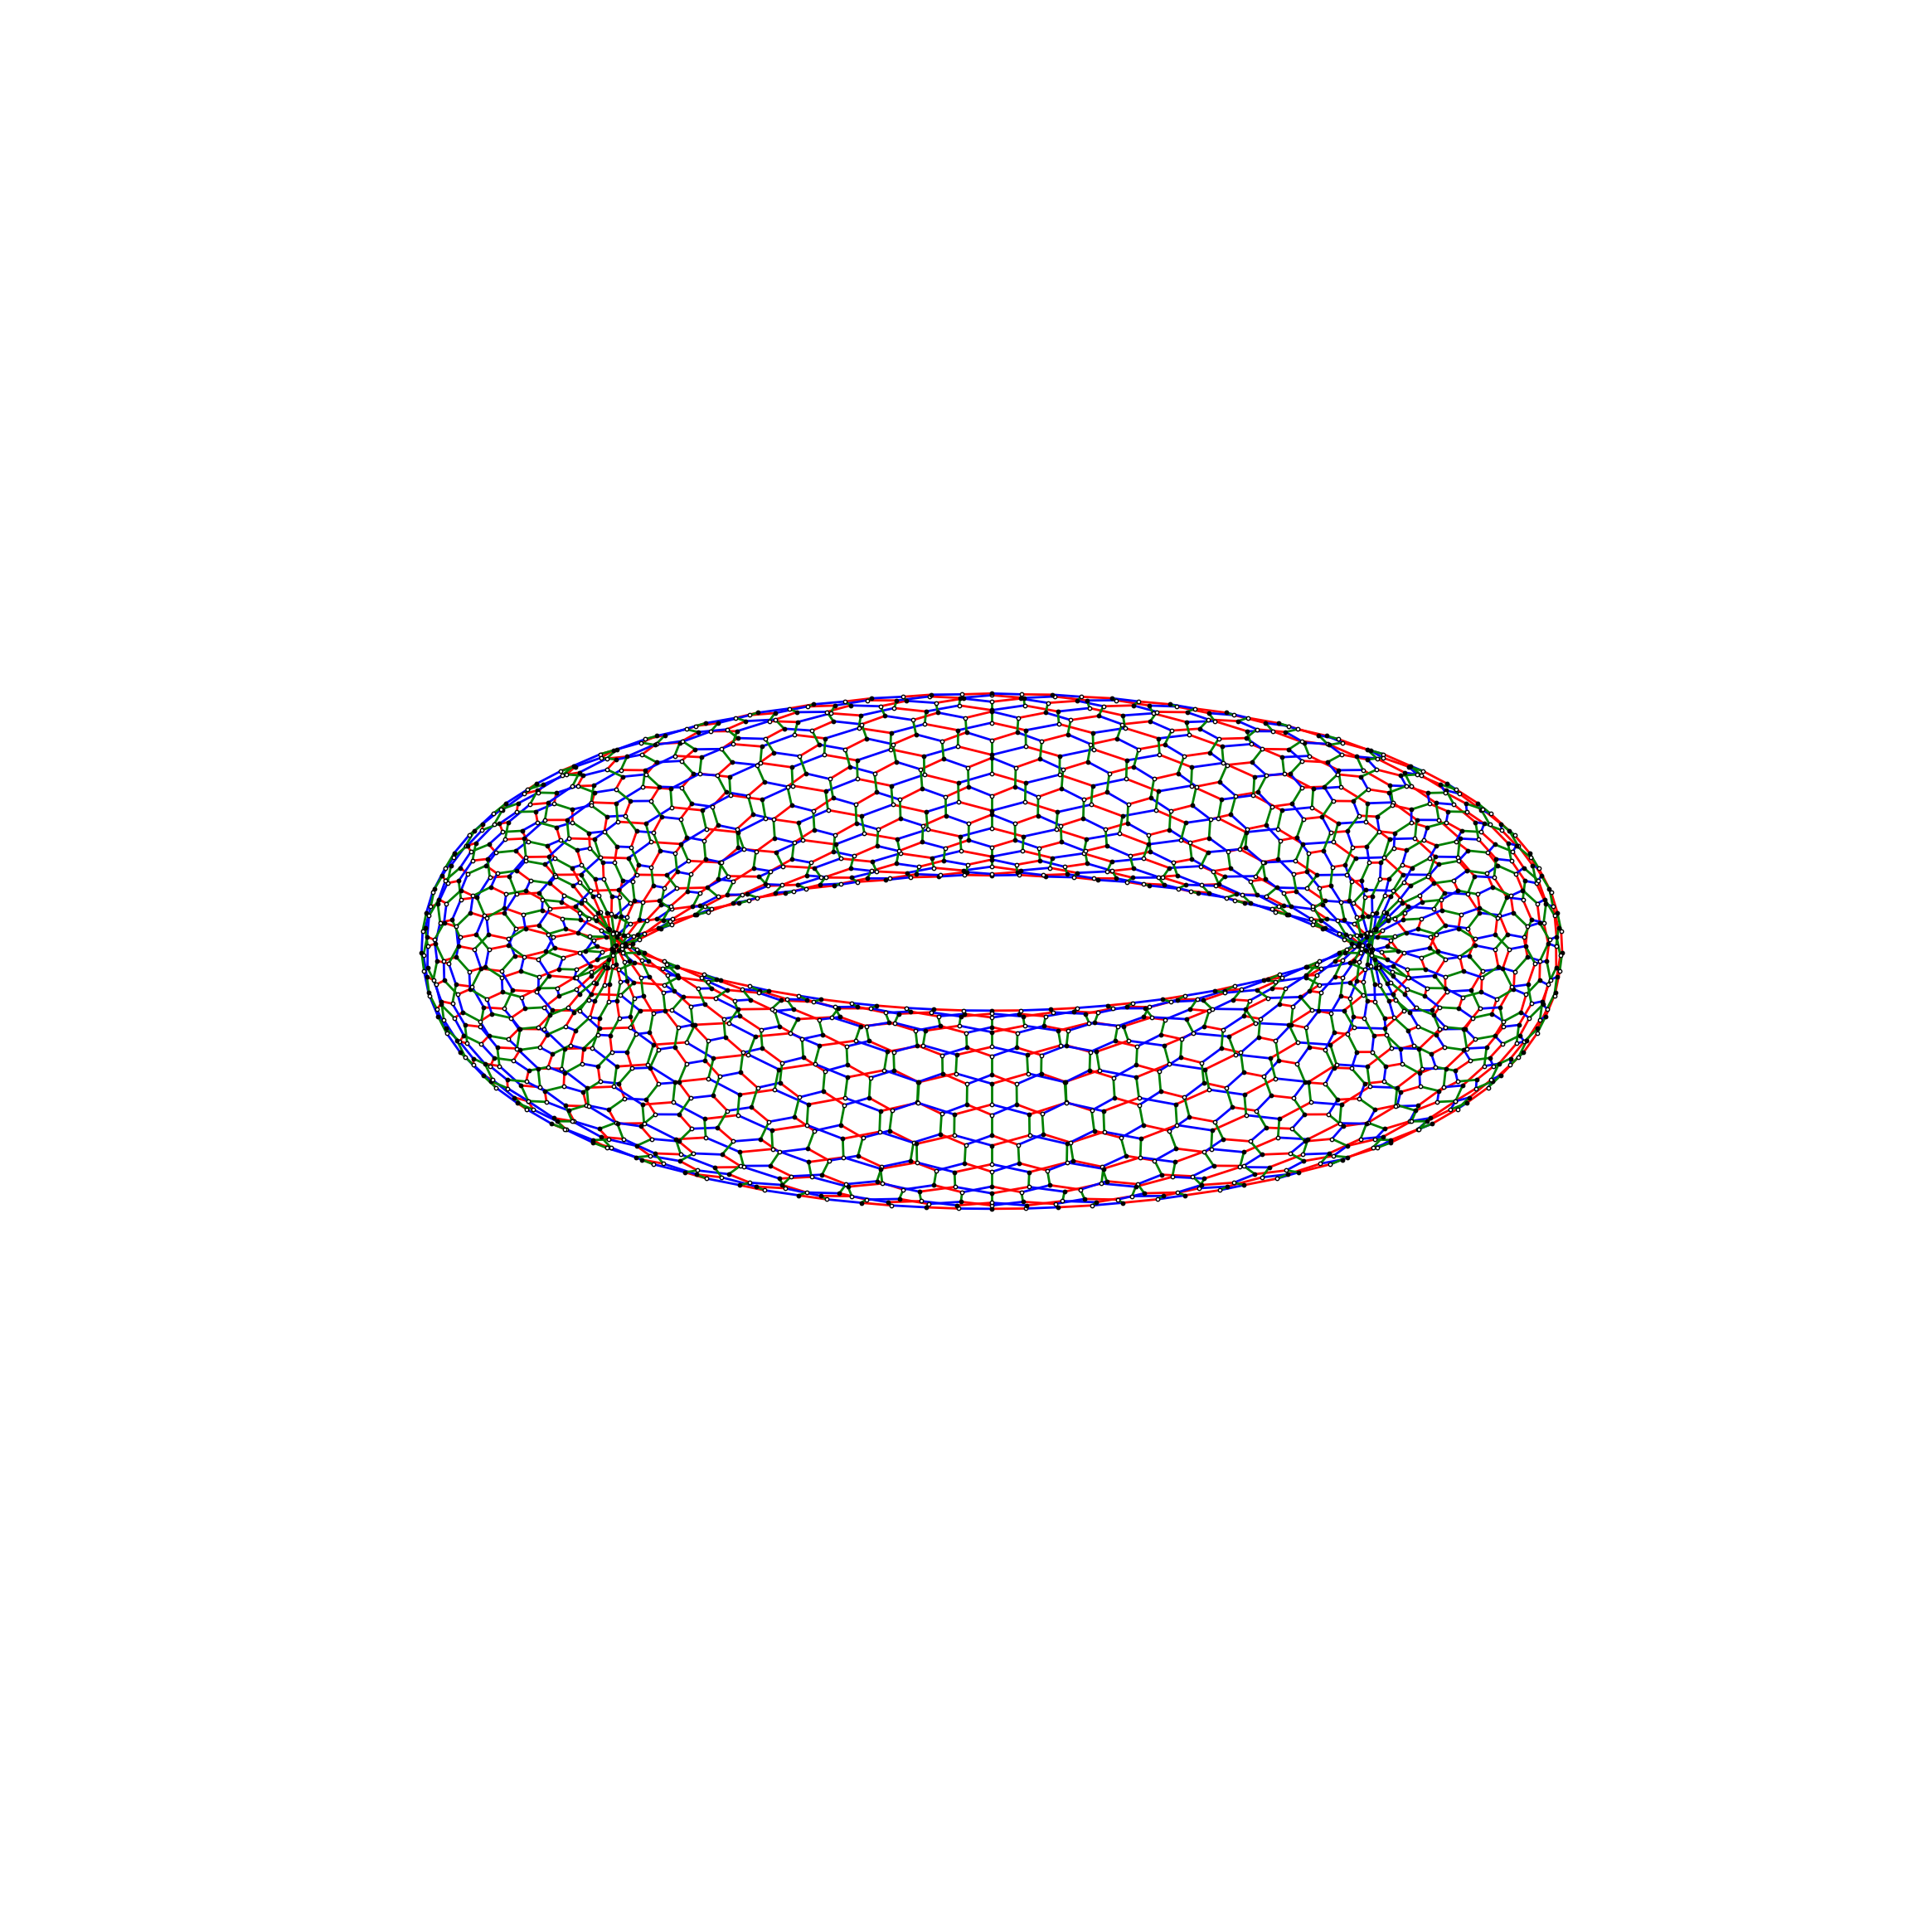

In [9]:
modell = site.SitesPBCxy(Npx = 50, Npy = 20)
# honey.plot_honeycomb(modell, plot_anyon_bonds= False, plot_diagonal_bonds = False, 
#                      #sites = indices, plaquette_site = 35
#                      )
honey.plot_honeycomb_torus(modell, elev= 20, frames = 10, interval = 70,
                           make_gif=False,
                           gif_filename= "torus_rotation.gif",
                           azim = 0, r_0 = 100, r_tilde = 20, plot_anyon_bonds = False, fig_size = (30,30), dotsize = 10)

In [20]:
print(modell.id_to_idxidy(35))
print(modell.idxidy_to_id(5,4))

(35, 0)
405


## QUASI-ENERGY SPECTRUM

In [10]:
import free_fermion_representation as f
importlib.reload(f)

<module 'free_fermion_representation' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/free_fermion_representation.py'>

In [24]:
model = site.SitesPBCxy(Npx=30, Npy=30)
fgs = f.FermionicGaussianRepresentation(model)
print(model.Nsites)

1800


In [39]:
T = 0.5
# t = T*np.pi/4.

We define R = R0z R0y R=x as the operator to diagonalize to find the quasi energies of the floquet operator $U = e^{- i \hat{H} t}$

In [40]:
R0x, R0y, R0z, R = fgs.floquet_operator_ham(T)

Now we proceed with doing the fourier transform of R, thus block diagonalizing R such that each block has eigenvalues indexed by a specific k momentum!

In [41]:
S = model.reordering_operator()
print(S.shape)
print(np.linalg.norm(S @ S.T - np.eye(S.shape[0])))
FT, ks1, ks2 = model.FTOperator()

(1800, 1800)
0.0


In [42]:
# block-diagonalize
Rk = FT.T.conj() @ R @ FT

len_block = 2

# diagonalize blocks
eps = []
for i in range(model.Npx*model.Npy):
    e = np.linalg.eigvals(Rk[len_block*i:len_block*i+len_block, len_block*i:len_block*i+len_block])
    eps.append(e)
eps = np.real_if_close(1j * np.log(eps))

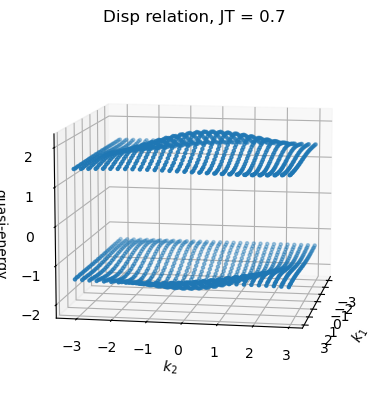

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

np.set_printoptions(threshold=np.inf)
ks1_ext = np.tile(np.repeat(ks1, len_block), len(ks2))
# print(ks1_ext)
ks2_ext = np.repeat(ks2, len_block * len(ks1))
# print(ks2_ext)

ax.scatter(ks1_ext, ks2_ext, np.reshape(eps.real, -1), s = 5)
ax.set_xlabel(r'$k_1$')
ax.set_ylabel(r'$k_2$')
ax.set_zlabel('quasi-energy')
ax.view_init(elev=10, azim=10)
ax.set_title(f'Disp relation, JT = {T}' )
plt.show()

<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:48: SyntaxWarning: invalid escape sequence '\o'
/var/folders/6j/zg3nz4053f97fyqx4w2b6pxc0000gn/T/ipykernel_97807/1895489445.py:48: SyntaxWarning: invalid escape sequence '\o'
  ax.set_zlabel('Energy $\omega(q)$')
/var/folders/6j/zg3nz4053f97fyqx4w2b6pxc0000gn/T/ipykernel_97807/1895489445.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  energies_all[i, :] = np.sort(eps_array[start:end])


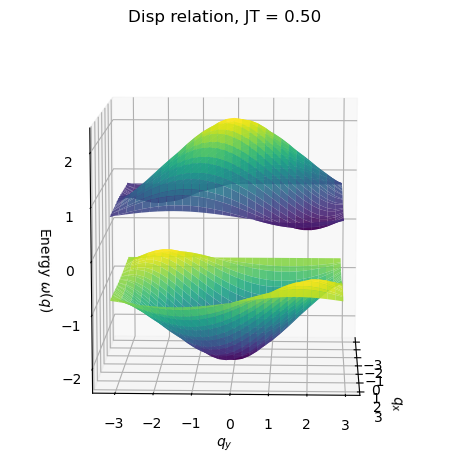

In [43]:
#better way of plotting this!

# Create a meshgrid for qx and qy values
qx_vals, qy_vals = np.meshgrid(ks1, ks2)

eps_array = np.reshape(eps, -1)
energies_all = np.zeros((len(ks1)*len(ks2), len_block))
# eps_array = np.concatenate([eps_array, eps_array[0:len_block]])
i = 0
for start in range(0, len(eps_array), len_block):
    end = start + len_block
    energies_all[i, :] = np.sort(eps_array[start:end])
    i += 1


# Reshape the energies to match the meshgrid dimensions
energies_all = energies_all.reshape(len(ks2), len(ks1), len_block)

# Start 3D plotting
fig = plt.figure(#figsize=(10, 10)
                 )
ax = fig.add_subplot(111, projection='3d')

# Set aspect ratio: (x, y, z). Increase z to stretch vertically
ax.set_box_aspect((1, 1, 1))  # Try (1, 1, 2), (1, 1, 3), etc.

# Parametri per evitare glitch visivi
surface_opts = {
    'linewidth': 0,
    'antialiased': True,  # meglio “True” per superfici lisce
    'rstride': 1,
    'cstride': 1,
    'alpha': 0.9,
    'cmap': 'viridis'
}

for band in range(len_block):
    energy_band = energies_all[:, :, band]
    energy_band = energy_band.round(6)  # Rounding to avoid visual glitches

    #Plot the surface for each energy band
    ax.plot_surface(qx_vals, qy_vals, energy_band,
                   **surface_opts)
    # print(energy_band)

ax.set_xlabel('$q_x$')
ax.set_ylabel('$q_y$')
ax.set_zlabel('Energy $\omega(q)$')
ax.view_init(elev=10, azim=2)
ax.set_title(f'Disp relation, JT = {T:.2f}')
plt.tight_layout()
plt.show()


In [37]:
import Energyspectrum as es
importlib.reload(es)

<module 'Energyspectrum' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/Energyspectrum.py'>

(880, 880)
0.0


/Users/giovanniconcheri/Desktop/TESI/MasterThesis/Energyspectrum.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  energies_all[i, :] = np.sort(eps_array[start:end])


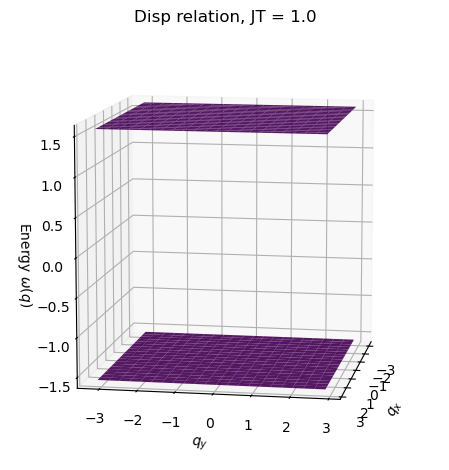

(880, 880)
0.0


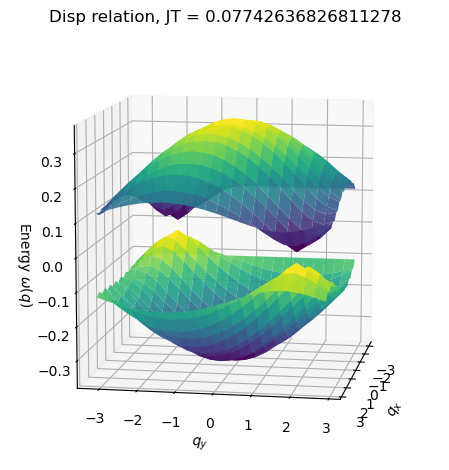

(880, 880)
0.0


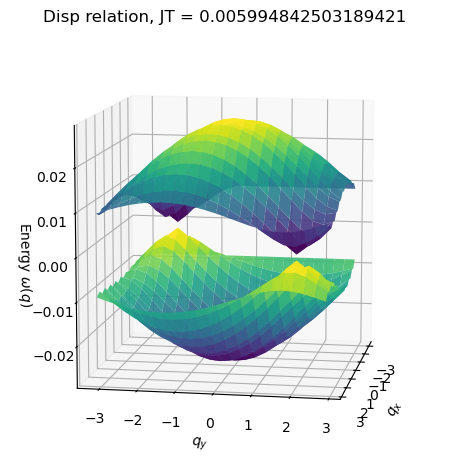

(880, 880)
0.0


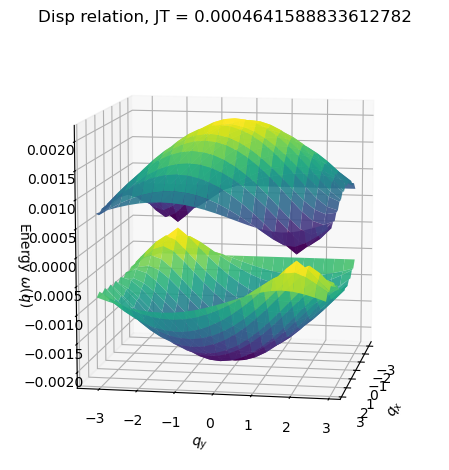

(880, 880)
0.0


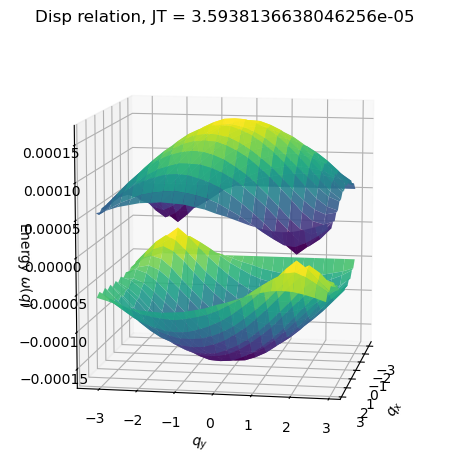

(880, 880)
0.0


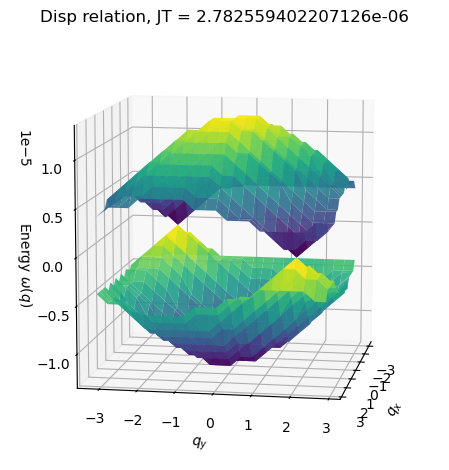

(880, 880)
0.0


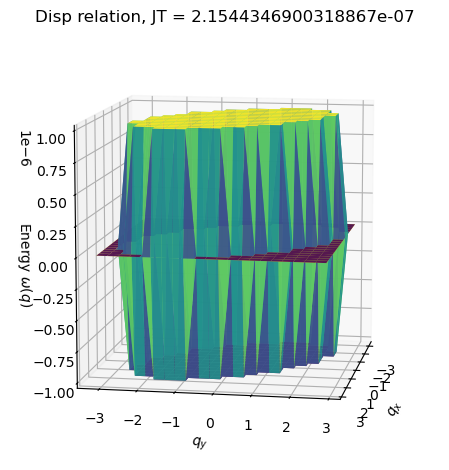

(880, 880)
0.0


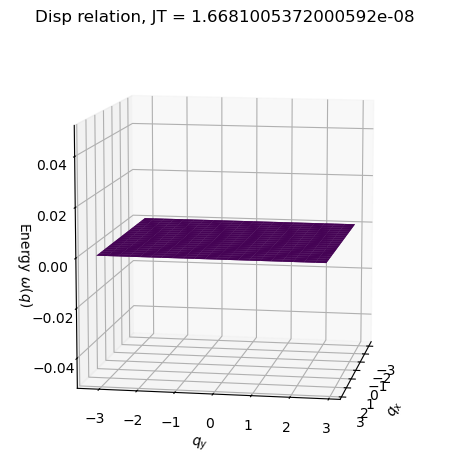

(880, 880)
0.0


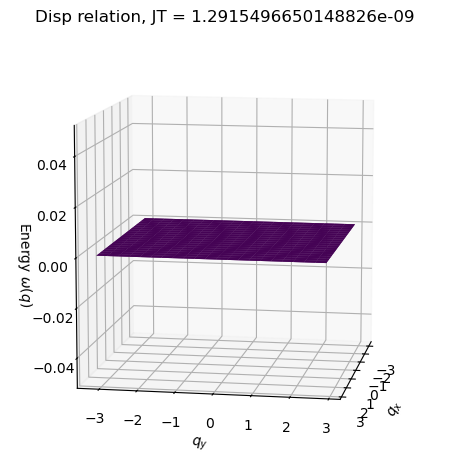

(880, 880)
0.0


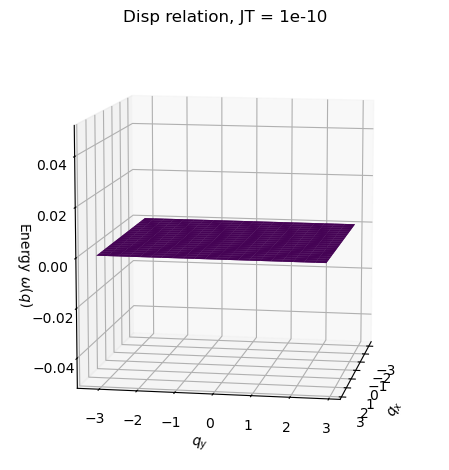

In [ ]:
Tlist = np.logspace(-10, 0, 10)
for T in Tlist[::-1]:
    es.plot_dispersion_relation(model, T, fgs.h0_x, fgs.h0_y, fgs.h0_z)